# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('/content/drive/My Drive/Human_Resources.csv')

In [4]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.shape

(1470, 35)

In [ ]:
# 35 features in total, each contains 1470 data points

In [15]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# TASK #3: VISUALIZE DATASET

In [44]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0) 
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x : 1 if x == 'Yes' else 0) 
employee_df['Over18'] = employee_df['Over18'].apply(lambda x : 1 if x == 'Y' else 0) 

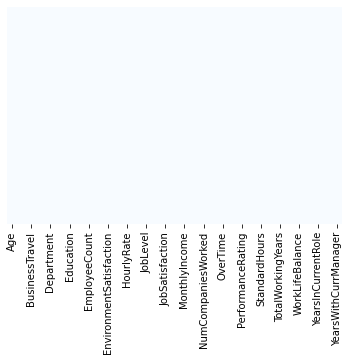

In [23]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(),yticklabels= False, cbar= False, cmap='Blues')
employee_df.isnull().sum()

In [29]:
employee_df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

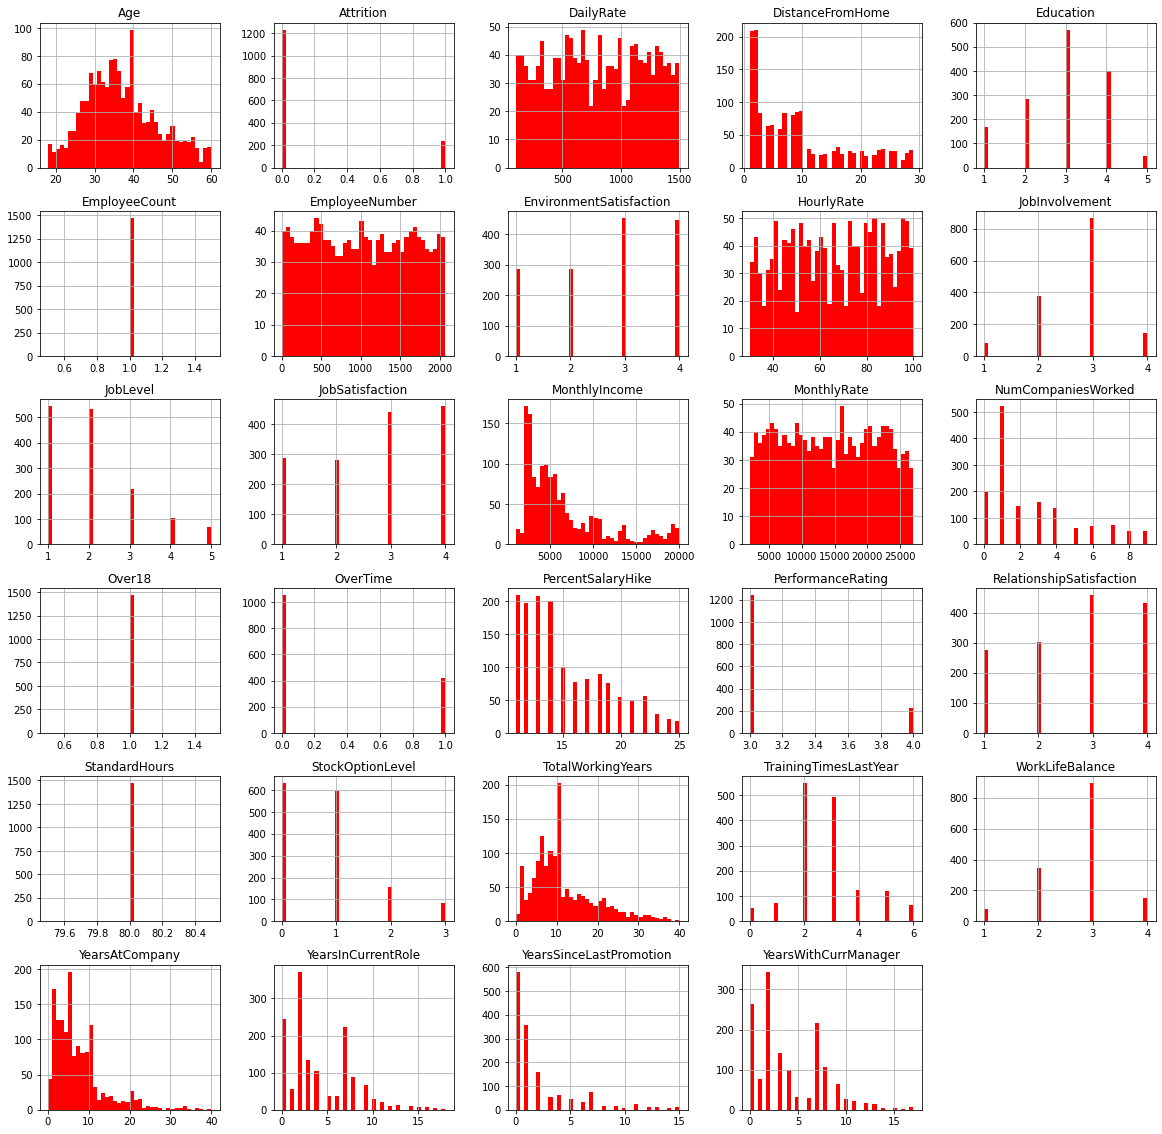

In [30]:
employee_df.hist(bins=40,figsize=(20,20),color = 'red')
plt.show()

# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other



In [45]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1,inplace=True)

In [46]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [42]:
# Let's see how many employees left the company! 
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

1470

In [57]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Total :', len(employee_df))
print('Number of employees who left : ',len(left_df))
print('% of employees who left : ', len(left_df) / len(employee_df) * 100, '%')

print('Number of employees who stay : ',len(stayed_df))
print('% of employees who stay : ', len(stayed_df) / len(employee_df) * 100, '%')

Total : 1470
Number of employees who left :  237
% of employees who left :  16.122448979591837 %
Number of employees who stay :  1233
% of employees who stay :  83.87755102040816 %


In [51]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [58]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


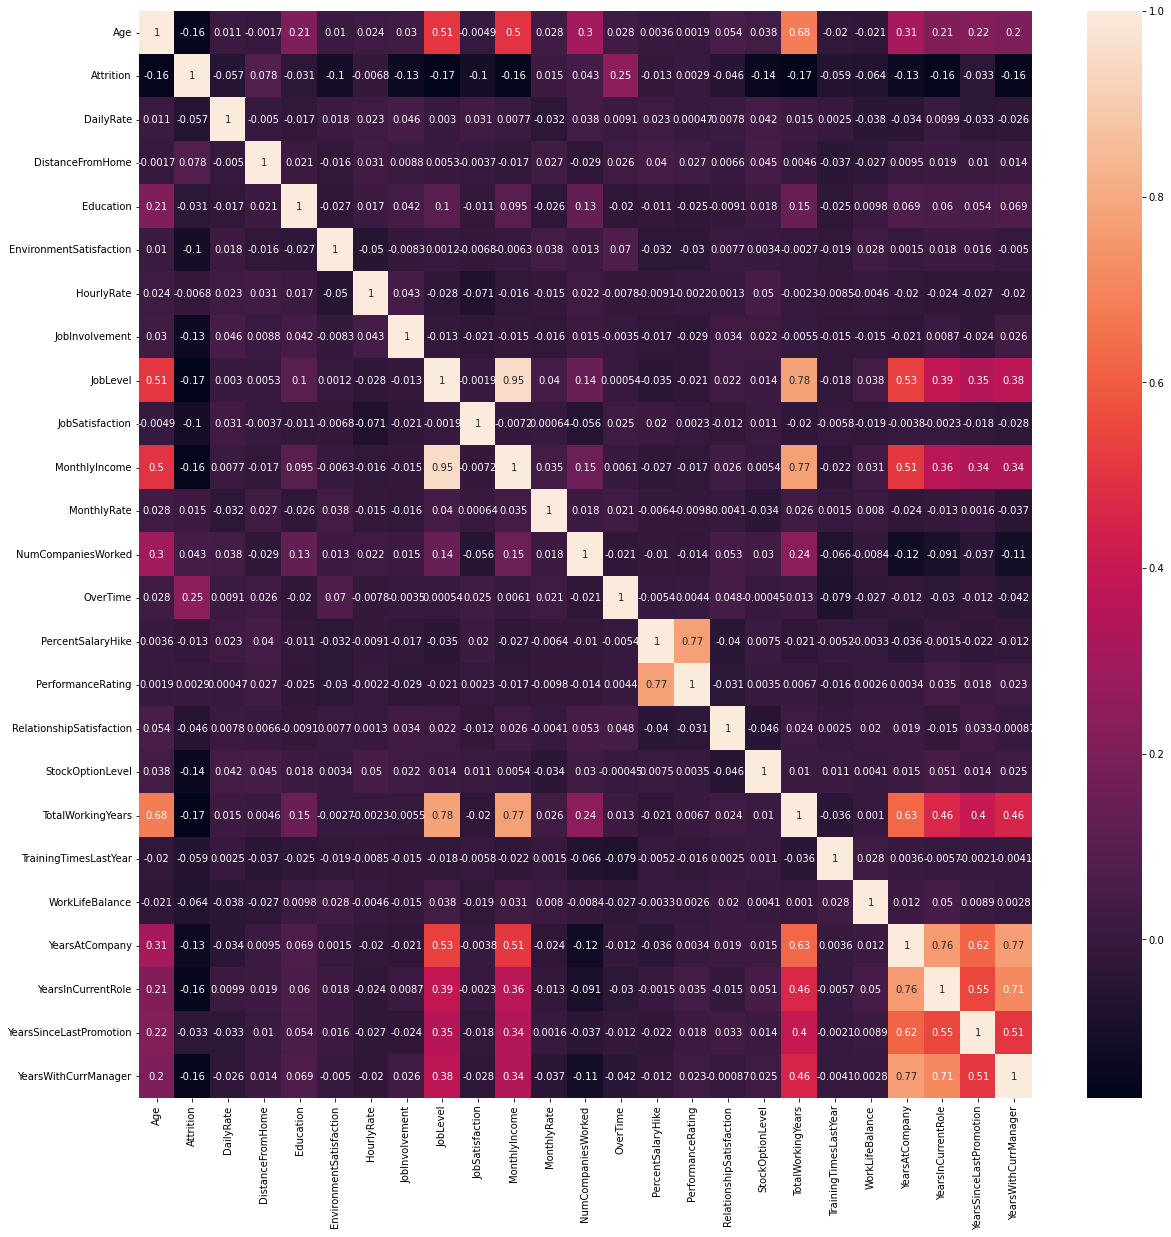

In [59]:
correlations = employee_df.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


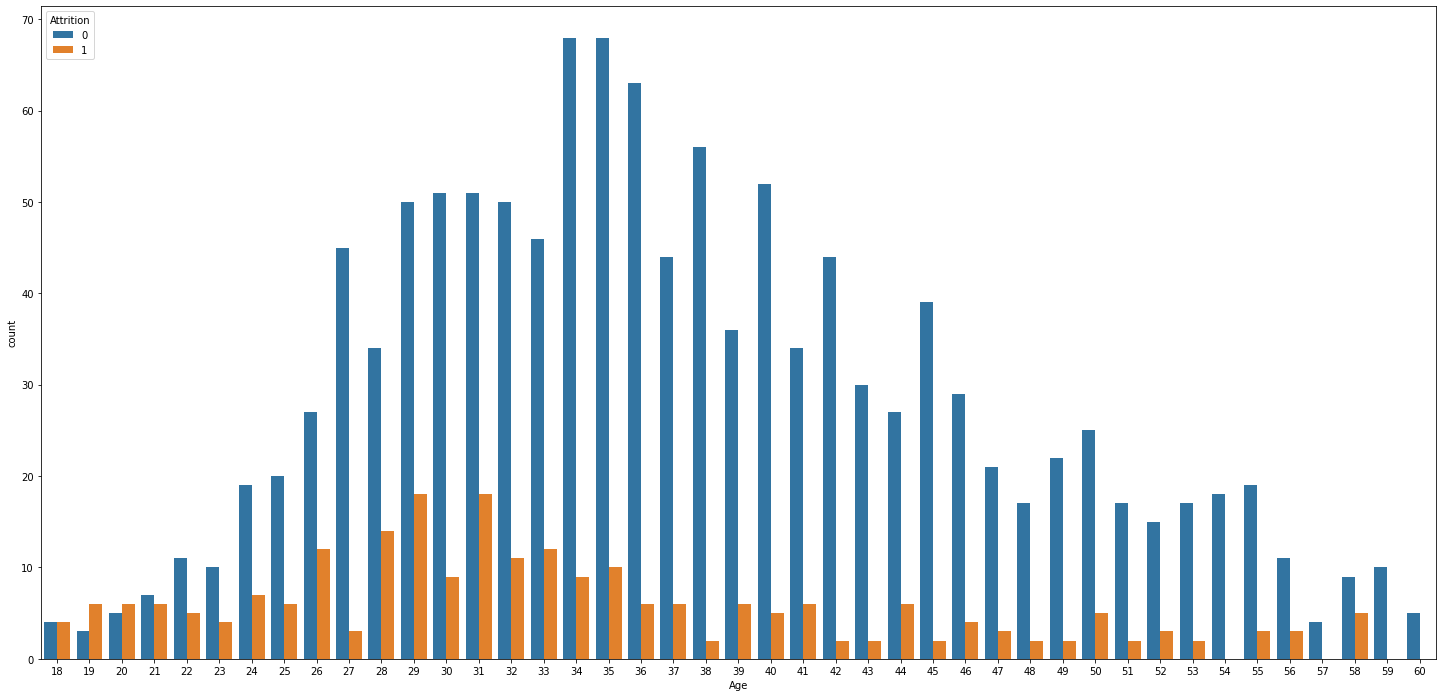

In [60]:
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

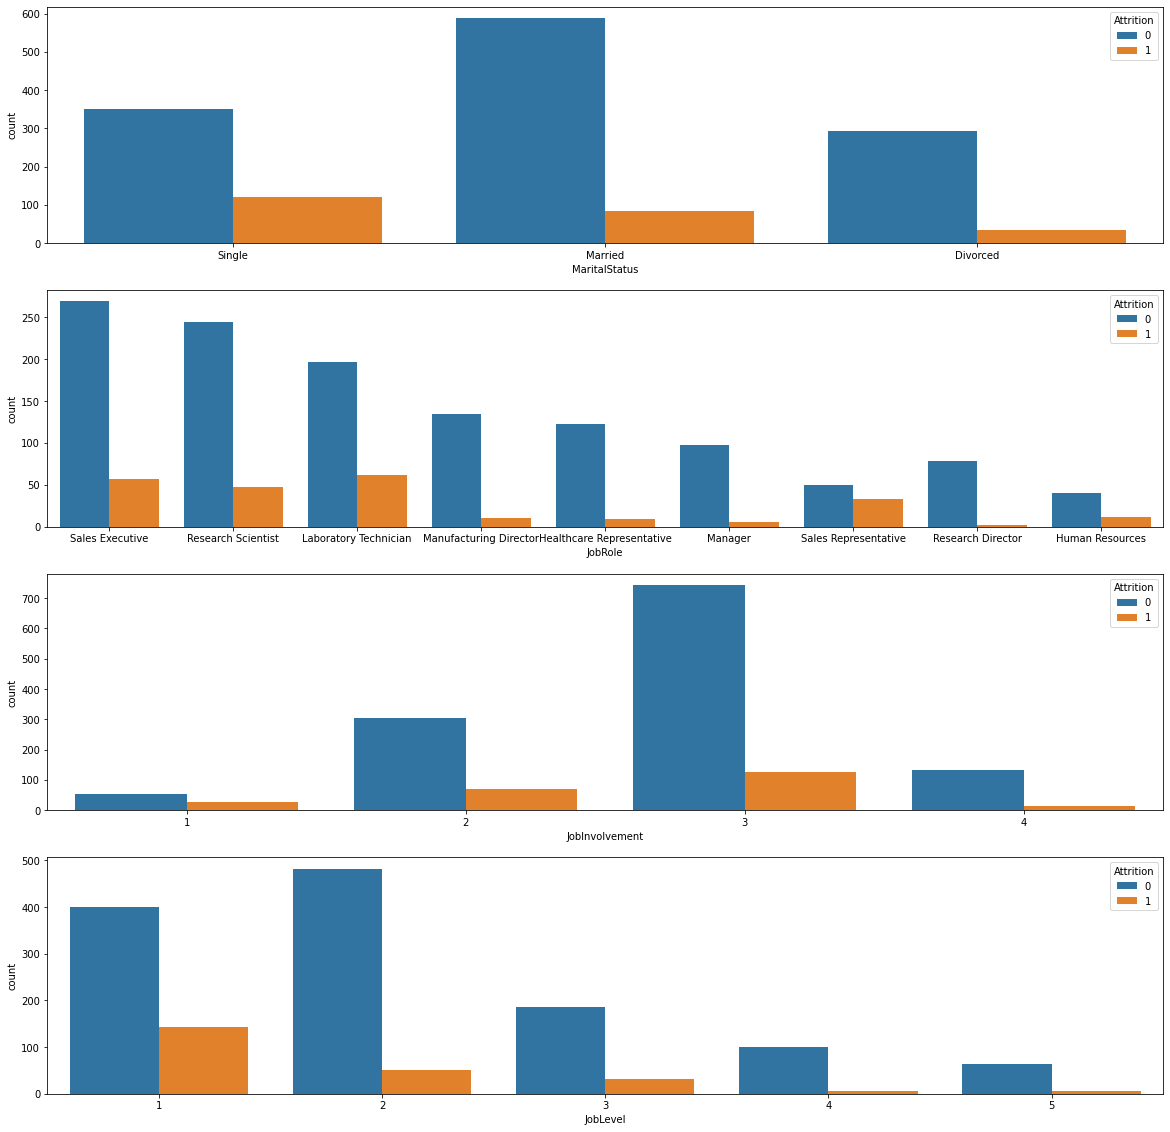

In [67]:
plt.figure(figsize = (20,20))
plt.subplot(411)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

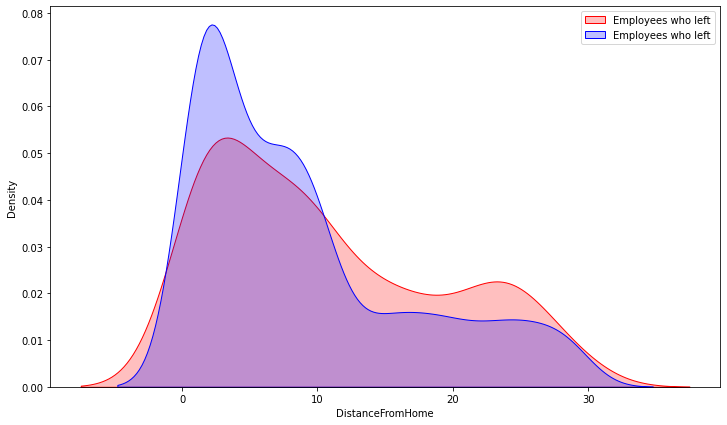

In [71]:
#KDE (Kernel Density Estimate)

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'],label = 'Employees who left', shade = True , color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'],label = 'Employees who stay', shade = True , color = 'b')
plt.legend()

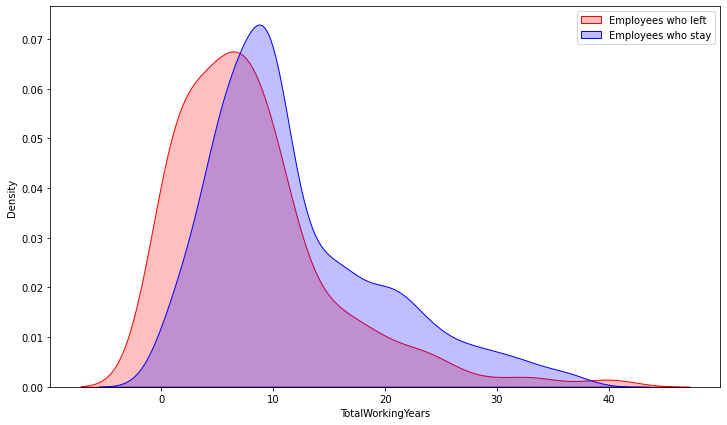

In [73]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade= True, color = 'r' )
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stay', shade= True, color = 'b' )
plt.legend()
plt.show()

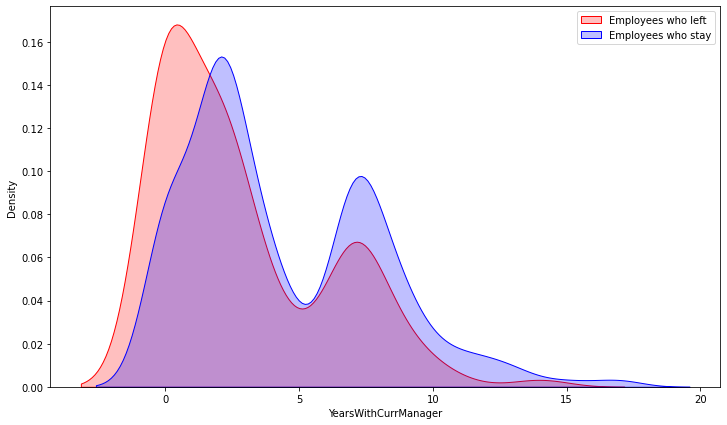

In [74]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade= True, color = 'r' )
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stay', shade= True, color = 'b' )
plt.legend()
plt.show()

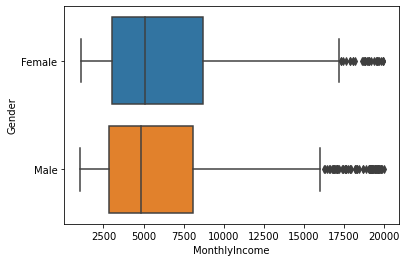

In [76]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

No handles with labels found to put in legend.


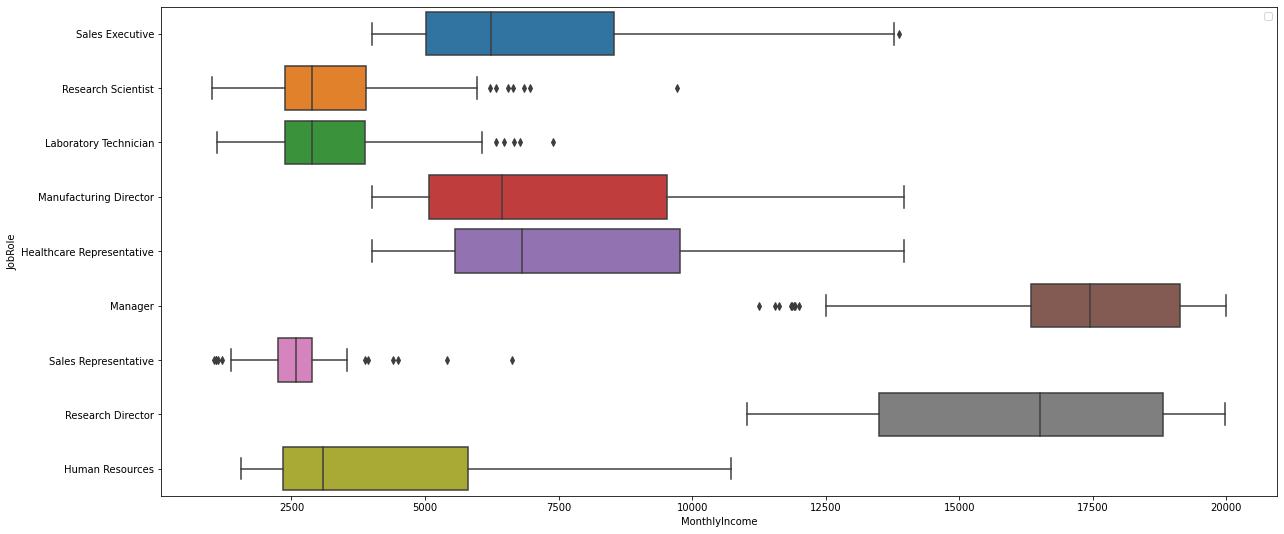

In [80]:
# Let's see the JobRole vs. Monthly Income
plt.figure(figsize=(20,9))
sns.boxplot() x = 'MonthlyIncome', y = 'JobRole', data = employee_df)
plt.legend()

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [81]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [84]:
# Categorical columns
X_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [85]:
#Convert Categorical Columns to One Hot Encoder Vectors
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [87]:
X_cat.shape

(1470, 26)

In [88]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
# note that we dropped the target 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [91]:
# Combining Categorical Columns and Numerical Columns
X_all = pd.concat([X_cat,X_numerical],axis=1)

In [92]:
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [93]:
# Normalization process
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [94]:
# Train data is ready
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [97]:
# Target data is ready
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS 

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [100]:
X_train.shape

(1029, 50)

In [101]:
X_test.shape

(441, 50)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [104]:
y_pred = model.predict(X_test)

In [105]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
# Testing Set Performance
from sklearn.metrics import confusion_matrix, classification_report

print('Accuray {} %'.format(100 * accuracy_score(y_pred,y_test)))

Accuray 89.1156462585034 %


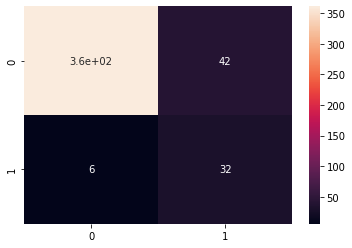

In [108]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)


In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       403
           1       0.43      0.84      0.57        38

    accuracy                           0.89       441
   macro avg       0.71      0.87      0.75       441
weighted avg       0.94      0.89      0.91       441



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [111]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)


RandomForestClassifier()

In [112]:
y_pred_rfc = model_rfc.predict(X_test)

In [113]:
y_pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
# Testing Set Performance
print('Accuracy {} %'.format(100*accuracy_score(y_pred_rfc,y_test)))


Accuracy 85.26077097505669 %


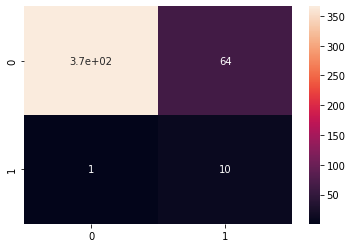

In [116]:
cm_rfc = confusion_matrix(y_pred_rfc,y_test)
sns.heatmap(cm_rfc,annot=True)

In [117]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       430
           1       0.14      0.91      0.24        11

    accuracy                           0.85       441
   macro avg       0.57      0.88      0.58       441
weighted avg       0.98      0.85      0.90       441



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [120]:
import tensorflow as tf

model_tf = tf.keras.models.Sequential()

model_tf.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50,)))
model_tf.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_tf.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model_tf.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [122]:
model_tf.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [124]:
model_tf.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [125]:
epochs_history = model_tf.fit(X_train,y_train,epochs = 100,batch_size = 50, verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 7ms/step - loss: 0.4261 - accuracy: 0.8416
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3484 - accuracy: 0.8581
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.8649
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.2906 - accuracy: 0.8863
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.8999
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.9125
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1873 - accuracy: 0.9291
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1597 - accuracy: 0.9456
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 0.1137 - accuracy: 0.9534
Epoch 10/100
21/21 [==============================] - 0s 8ms/step - loss: 0.1100 - accuracy: 0.9543
Epoch 11/

In [126]:
# Testing Set Performance
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = (y_pred_tf > 0.5)

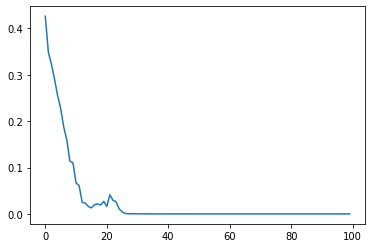

In [129]:
plt.plot(epochs_history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

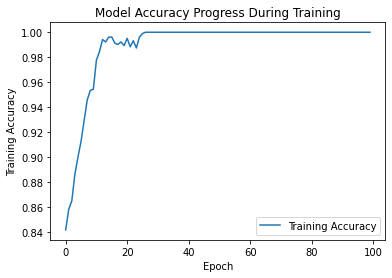

In [130]:
plt.plot(epochs_history.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

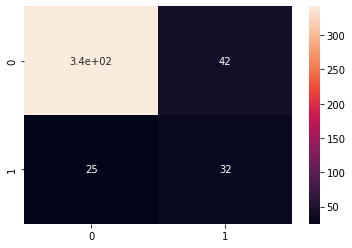

In [131]:
cm_tf = confusion_matrix(y_pred_tf,y_test)
sns.heatmap(cm_tf,annot=True)

In [132]:
print(classification_report(y_pred_tf,y_test))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91       384
        True       0.43      0.56      0.49        57

    accuracy                           0.85       441
   macro avg       0.68      0.73      0.70       441
weighted avg       0.87      0.85      0.86       441



In [142]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)
epochs_hist = model_tf.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


Epoch 1/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3764 - accuracy: 0.8984
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 0.1296 - accuracy: 0.9475
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9983
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 0.9988
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 3.7060e-04 - accuracy: 1.0000
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 2.2749e-04 - accuracy: 1.0000
Epoch 9/100
35/35 [==============================] - 0s 8ms/step - loss: 1.6171e-04 - accuracy: 1.0000
Epoch 10/100
35/35 [==============================] - 0s 7ms/step - loss: 1.3063e-04 - accuracy: 

In [151]:
y_pred_tf = model_tf.predict(X_test)

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS